MODELLING IN BIOLOGY: Dr Danny Raj, Rupesh Mahore

IISc Bangalore

> *Reference : Nonlinear dynamics and Chaos :Steven Strogatz*






# Day 2 : 
1. Solving ODE using odeint
2. Steady states.
3. Bifurcations.
4. Limit cycles.
5. Demos and tutorials on modeling and simulation of simple ODE models.

# Solving differential equation

**odeint** is a function in the **scipy.integrate** module that can numerically solve systems of ODEs. 

# Example 1: $dy/dt = -2y + 5$

In this example, we define a simple ODE system $dy/dt = -2y + 5$ , and use odeint to numerically solve it. 
0. Create a function $f(y,t) = dy/dx$
1. We define the initial condition as **y0 = 0**

2. Time points to evaluate the solution as **t = np.linspace(0, 4, 100)**, which generates an array of 100 equally spaced time points between 0 and 4.

3. We then call **odeint(my_ode_system, y0, t)** to solve the ODE system, which returns an array y containing the solution at each time point in t.

4. Finally, we plot the solution using matplotlib.pyplot.plot, with time on the x-axis and the solution y on the y-axis.

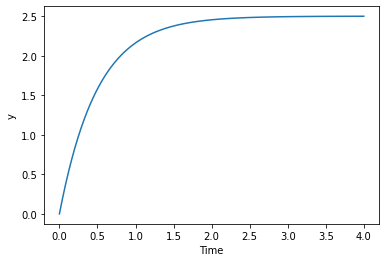

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def my_ode_system(y, t):
    dydt = -2 * y + 5
    return dydt

# Define the initial condition
y0 = 0

# Define the time points to evaluate the solution
t = np.linspace(0, 4, 100)

# Solve the ODE system
y = odeint(my_ode_system, y0, t)

# Plot the solution
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('y')
plt.show()


Solve $dy/dt= -5y^2$

# Different initial conditions y0

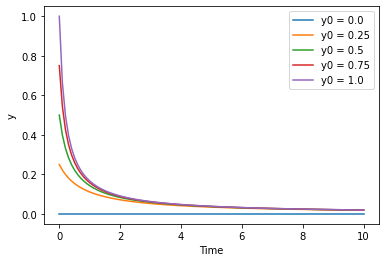

In [41]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def my_ode_system(y, t):
    dydt = -5 * y**2
    return dydt

# Define the time points to evaluate the solution
t = np.linspace(0, 10, 100)

# Define the initial conditions for y0
y0_values = np.linspace(0, 1, 5)

# Solve the ODE system for each initial condition and plot the solutions
for y0 in y0_values:
    y = odeint(my_ode_system, y0, t)
    plt.plot(t, y,label=f"y0 = {y0}")

plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()


# Example 2: Simple Harmonic oscillator




The equation for simple harmonic motion can also be expressed in the form of a second-order ordinary differential equation (ODE):

$\frac{d^2 x}{dt^2} + \omega^2 x = 0$

where:

$\frac{d^2 x}{dt^2}$ is the second derivative of displacement with respect to time, which represents acceleration,

$\omega$ is the angular frequency of the motion, 

and
$x$ is the displacement of the object from its equilibrium position.


This ODE describes the motion of a simple harmonic oscillator, such as a mass-spring system or a pendulum.

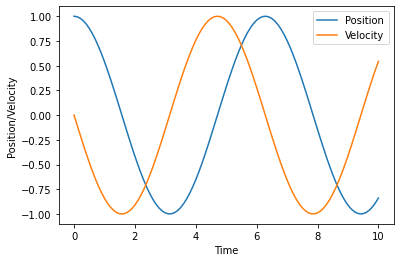

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def harmonic_oscillator(y, t, omega):
    x, v = y
    dxdt = v
    dvdt = -omega**2*x
    return [dxdt, dvdt]

# Define the parameters and initial conditions
omega = 1
x0, v0 = 1, 0

# Define the time points to evaluate the solution
t = np.linspace(0, 10, 101)

# Solve the ODE system
y = odeint(harmonic_oscillator, [x0, v0], t, args=(omega,))

# Plot the solution
plt.plot(t, y[:,0], label='Position')
plt.plot(t, y[:,1], label='Velocity')
plt.xlabel('Time')
plt.ylabel('Position/Velocity')
plt.legend()
plt.show()


# Example 3: A damped harmonic oscillator


Solve :  $m(d^2y/dt^2) + b(dy/dt) + ky = 0$

The equation for damped simple harmonic motion can also be expressed in the form of a second-order ordinary differential equation (ODE):

$\frac{d^2 x}{dt^2} + 2\gamma\frac{dx}{dt} + \omega_0^2 x = 0$

where:

$\frac{d^2 x}{dt^2}$ is the second derivative of displacement with respect to time, which represents acceleration,
$\frac{dx}{dt}$ is the first derivative of displacement with respect to time, which represents velocity,
$\gamma$ is the damping coefficient,
$\omega_0$ is the natural (undamped) frequency of the motion, and
$x$ is the displacement of the object from its equilibrium position.
This ODE describes the motion of a damped harmonic oscillator, such as a mass-spring system with friction or an electrical circuit with resistance.

We define the ODE system for a damped harmonic oscillator, which is given by m*y'' + b*y' + k*y = 0. 

We define the **function harmonic_oscillator** to take three arguments: 

**y**, which is a list containing the position y[0] and velocity y[1]

**t**, which is the current time

**k, b, and m**, which are the parameters of the system.



```
def harmonic_oscillator(y, t, k, b, m):
    dydt = [y[1], -k*y[0]/m - b*y[1]/m]
    return dydt
```



We define the initial conditions as y0 = [1, 0], meaning the initial position is 1 and the initial velocity is 0. We define the time points to evaluate the solution as t = np.linspace(0, 10, 100).



```
Define the initial conditions and parameters
y0 = [1, 0]
t = np.linspace(0, 10, 100)
k = 1
b = 0.1
m = 1
```



We then call **odeint(harmonic_oscillator**, y0, t, args=(k, b, m)) to solve the ODE system. The args argument is used to pass the parameters k, b, and m to the function harmonic_oscillator. 



```
# Solve the ODE system
y = odeint(harmonic_oscillator, y0, t, args=(k, b, m))
```



The resulting array y contains the position and velocity at each time point in t.

Finally, we plot the position as a function of time using matplotlib.pyplot.plot



```
plt.plot(t, y[:, 0])
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()
```



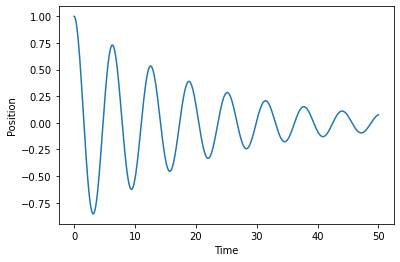

In [32]:
#Import necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system for a damped harmonic oscillator
def harmonic_oscillator(y, t, k, b, m):
    dydt = [y[1], -k*y[0]/m - b*y[1]/m]
    return dydt

# Define the initial conditions and parameters
y0 = [1, 0]
t = np.linspace(0, 50, 1000)
k = 1
b = 0.1
m = 1

# Solve the ODE system
y = odeint(harmonic_oscillator, y0, t, args=(k, b, m))

# Plot the solution
plt.plot(t, y[:, 0])
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


# Demo Problem 1: Lotka-Volterra Model
The Lotka-Volterra model, also known as the predator-prey model, is a classic example of a simple ODE model. It models the interactions between two species like a predator and a prey.

Lotka-Volterra model:

$$ \frac{dx}{dt} = ax - bxy $$
$$ \frac{dy}{dt} = cxy - dy $$

where x represents the population of the prey species and y represents the population of the predator species. The parameters a, b, c, and d are all positive constants that represent various factors affecting the populations, such as birth rates, death rates, and interaction rates.

To simulate this system and plot the population dynamics over time, we can use the following code:

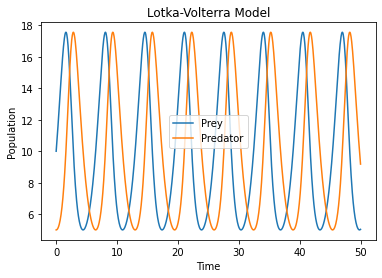

Text(0, 0.5, 'Prey')

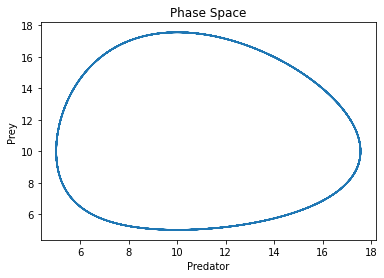

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def lotka_volterra(xy, t, a, b, c, d):
    x, y = xy
    dx_dt = a*x - b*x*y
    dy_dt = c*x*y - d*y
    return [dx_dt, dy_dt]

a = 1
b = 0.1
c = 0.1
d = 1
xy0 = [10, 5]
t = np.linspace(0, 50, 1000)

xy = odeint(lotka_volterra, xy0, t, args=(a, b, c, d))
x = xy[:,0]
y = xy[:,1]

plt.plot(t, x, label='Prey')
plt.plot(t, y, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model')
plt.legend()
plt.show()


plt.plot(x, y)
plt.title('Phase Space')
plt.xlabel('Predator')
plt.ylabel('Prey')

# Interactive Lotka Voltera

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def lotka_volterra(xy, t, a, b, c, d):
    x, y = xy
    dx_dt = a*x - b*x*y
    dy_dt = c*x*y - d*y
    return [dx_dt, dy_dt]

xy0 = [10, 5]
t = np.linspace(0, 50, 1000)

def plot_lotka_volterra(a, b, c, d):
    xy = odeint(lotka_volterra, xy0, t, args=(a, b, c, d))
    x = xy[:,0]
    y = xy[:,1]

    plt.plot(t, x, label='Prey')
    plt.plot(t, y, label='Predator')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Lotka-Volterra Model')
    plt.legend()
    plt.show()

    plt.plot(x, y)
    plt.title('Phase Space')
    plt.xlabel('Predator')
    plt.ylabel('Prey')
    plt.show()

# Define the sliders for a, b, c, and d
a_slider = FloatSlider(min=0, max=2, step=0.1, value=1, description='a:')
b_slider = FloatSlider(min=0, max=1, step=0.05, value=0.1, description='b:')
c_slider = FloatSlider(min=0, max=1, step=0.05, value=0.1, description='c:')
d_slider = FloatSlider(min=0, max=2, step=0.1, value=1, description='d:')

# Call the plot function with the sliders
interact(plot_lotka_volterra, a=a_slider, b=b_slider, c=c_slider, d=d_slider)


interactive(children=(FloatSlider(value=1.0, description='a:', max=2.0), FloatSlider(value=0.1, description='b…

<function __main__.plot_lotka_volterra(a, b, c, d)>

This code defines a function **lotka_volterra** that returns the derivatives of x and y with respect to time t, given the values of x, y, and the parameters a, b, c, and d. It then sets the values of the parameters and the initial values of x and y, creates an array of time values t, and uses odeint to simulate the system over time t. Finally, it extracts the values of x and y from the simulation results and plots them as a function of time.

The resulting plot should show the population dynamics of the prey and predator species over time. You should see oscillations in the population of each species, with the predator population lagging behind the prey population.

# Demo Problem 2: Logistic Growth Model
The logistic growth model is another classic example of a simple ODE model, commonly used to model the growth of a population in a limited environment. The model is given by:

$$ \frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right) $$

where x represents the population size, r represents the growth rate, and K represents the carrying capacity of the environment.

To simulate this system and plot the population dynamics over time, 

# Write the code

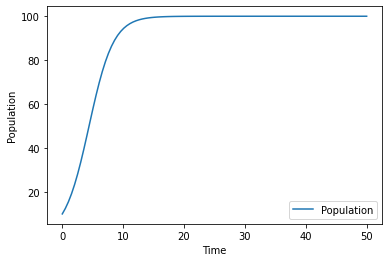

In this example, we define the logistic_growth function to represent the logistic growth ODE system. The function takes the state vector y, which in this case is just the population size N, the time t, and the parameters r (growth rate) and K (carrying capacity). The function calculates the derivative of N with respect to t using the logistic growth equation.

We then define the parameters and initial conditions, and use odeint to solve the ODE system over the given time range t. Finally, we plot the population size as a function of time using matplotlib.

Note that in this example, the logistic growth function only takes a single state variable N, since the logistic growth equation is a first-order ODE. If we wanted to model more complex systems with multiple variables, we would need to modify the logistic_growth function to take additional state variables and return their derivatives as well.

# Spruce Budworm 

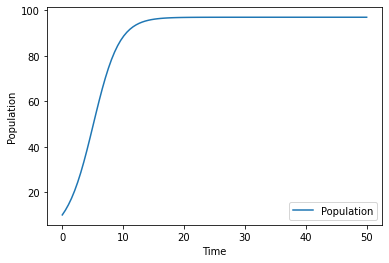

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def logistic_growth(y, t, r, K, A,B):
    N = y
    dNdt = (r * N * (1 - N/K)) - B*(N**2) /((N**2) + A**2)
    return dNdt

# Define the parameters and initial conditions
r = 0.5 # growth rate
K = 100 # carrying capacity
N0 = 10 # initial population
A=10
B=1.5
# Define the time points to evaluate the solution
t = np.linspace(0, 50, 100)

# Solve the ODE system
y = odeint(logistic_growth, N0, t, args=(r,K,A,B))

# Plot the solution
plt.plot(t, y[:,0], label='Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


# Steady States
Steady states are equilibrium points of a system, where the state variables do not change with time. In other words, the derivatives of the state variables are zero at a steady state.

Let's consider a simple example:

$$ \frac{dx}{dt} = x(1-x) $$

To find the steady states, we set the derivative equal to zero and solve for $x$:

$$ \frac{dx}{dt} = x(1-x) = 0 $$

This equation has two steady states: $x = 0$ and $x = 1$. To visualize this, we can plot the vector field and the nullclines of the system:

(The x-nullcline is a set of points in the phase plane so that dx/ dt = 0. Geometrically, these are the points where the vectors are either straight up or straight down.)

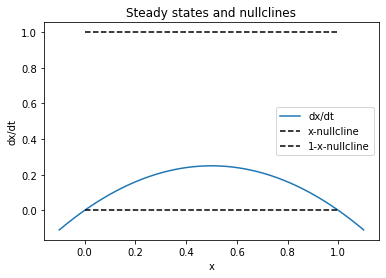

In [ ]:
def dx_dt(x, t):
    return x * (1 - x)

x = np.linspace(-0.1, 1.1, 1000)
t = 0

plt.plot(x, dx_dt(x, t), label='dx/dt')
plt.plot([0, 1], [0, 0], 'k--', label='x-nullcline')
plt.plot([0, 1], [1, 1], 'k--', label='1-x-nullcline')
plt.legend()
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.title('Steady states and nullclines')
plt.show()


This code defines a function dx_dt that returns the derivative of x at time t. It then creates an array of x values and sets t to zero. It then plots the derivative of x with respect to time (dx/dt), as well as the nullclines of the system. The nullclines are the curves where the derivative is zero, and are shown as dashed lines.

The resulting plot should show two steady states at x=0 and x=1, as well as the nullclines crossing at these points.

# Bifurcations
Bifurcations occur when the qualitative behavior of a system changes as a parameter is varied. In other words, the steady states and/or limit cycles of a system can change as a parameter is varied.

Let's modify our previous example by adding a parameter r:

$$ \frac{dx}{dt} = rx(1-x) $$

This equation represents the logistic equation, which is used to model population growth. The parameter r represents the growth rate of the population.

To find the steady states, we again set the derivative equal to zero and solve for x:

$$ \frac{dx}{dt} = rx(1-x) = 0 $$

This equation has three steady states: x=0, x=1, and x=r-1. To visualize this, we can plot the steady states as a function of r:

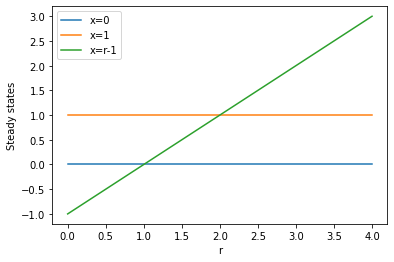

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic equation
def logistic(x, r):
    return r*x*(1-x)

# Define the range of r values to plot
r_values = np.linspace(0, 4, 1000)

# Calculate the steady states for each r value
steady_states = np.zeros((1000, 3))
steady_states[:, 0] = 0
steady_states[:, 1] = 1
steady_states[:, 2] = r_values - 1

# Plot the steady states as a function of r
plt.plot(r_values, steady_states[:, 0], label='x=0')
plt.plot(r_values, steady_states[:, 1], label='x=1')
plt.plot(r_values, steady_states[:, 2], label='x=r-1')
plt.xlabel('r')
plt.ylabel('Steady states')
plt.legend()
plt.show()


This code defines a function logistic that returns the derivative of x with respect to time t, given a value of x and r. It then creates an array of r values and calculates the steady states for each value of r. Finally, it plots the steady states as a function of r.

The resulting plot should show a bifurcation diagram, where the stable steady state changes as r is increased beyond a critical value.

# Limit Cycles
Limit cycles are periodic solutions of a system, where the state variables repeat themselves after a certain period. In other words, the derivatives of the state variables are periodic functions of time.

Let's consider the following example:

$$ \frac{dx}{dt} = -y - x^3 $$
$$ \frac{dy}{dt} = x - y^3 $$

This system is known as the van der Pol oscillator, which is commonly used to model the behavior of electrical circuits and biological systems.

To simulate this system, we first define a function vdp that returns the derivatives of x and y with respect to time t:

In [ ]:
def vdp(xy, t, mu):
    x, y = xy
    dx_dt = -y - mu * (x**2 - 1) * x
    dy_dt = x - y**3
    return [dx_dt, dy_dt]


This function takes in a vector xy, representing the values of x and y, as well as a parameter mu representing the stiffness of the system. It then returns the derivatives of x and y with respect to time t, as calculated using the van der Pol equations.

To simulate the system and plot the resulting limit cycle, we can use the following code:

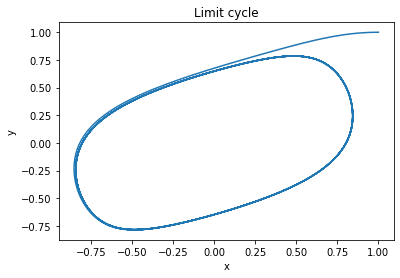

In [ ]:
mu = 1
t = np.linspace(0, 50, 1000)
xy0 = [1, 1]

xy = odeint(vdp, xy0, t, args=(mu,))
x = xy[:,0]
y = xy[:,1]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Limit cycle')
plt.show()


This code sets the value of mu to 1, creates an array of time values t, and sets the initial values of x and y to 1. It then uses odeint to simulate the system over time t, starting from initial values xy0 and using the vdp function and the value of mu. Finally, it extracts the values of x and y from the simulation results and plots them in a phase space diagram.

The resulting plot should show a limit cycle in the phase space, representing the periodic behavior of the van der Pol oscillator

# $dy/dt = -5 y^2 $

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def my_ode_system(y, t):
    dydt = -5 * y**2
    return dydt

# Define the initial condition
y0 = 1

# Define the time points to evaluate the solution
t = np.linspace(0, 4, 100)

# Solve the ODE system
y = odeint(my_ode_system, y0, t)

# Plot the solution
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('y')
plt.show()




Code for LOTKA VOLTERA





In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def logistic_growth(y, t, r, K):
    N = y
    dNdt = r * N * (1 - N/K)
    return dNdt

# Define the parameters and initial conditions
r = 0.5 # growth rate
K = 100 # carrying capacity
N0 = 10 # initial population

# Define the time points to evaluate the solution
t = np.linspace(0, 50, 100)

# Solve the ODE system
y = odeint(logistic_growth, N0, t, args=(r,K))

# Plot the solution
plt.plot(t, y[:,0], label='Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
